In [1]:
import pymysql
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
con = pymysql.connect(host='localhost', user='root', password='godisable__9',
                     db='5commerce', charset='utf8',
                     autocommit=True,
                     cursorclass=pymysql.cursors.DictCursor)
cur = con.cursor()

In [8]:
sql = "SELECT * FROM customers"
customers = psql.read_sql(sql, con)
con.close()

In [9]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [14]:
customers['FN'].unique()

array([nan,  1.])

In [15]:
customers['Active'].unique()

array([nan,  1.])

In [16]:
customers['club_member_status'].unique()

array(['ACTIVE', None, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [17]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', None, 'Monthly', 'None'], dtype=object)

##### fashion_new_frequency : none값 확인

In [23]:
pd.DataFrame(customers.groupby(['fashion_news_frequency']).size())

,0
fashion_news_frequency,
Monthly,842
NONE,877711
None,2
Regularly,477416


In [22]:
#None이 너무 많아서 FN 구독하지 않은 유저를 다 NONE으로 처리한건지 체크
pd.DataFrame(customers.groupby(['FN','fashion_news_frequency']).size())

0
FN  fashion_news_frequency        
1.0 Monthly                    829
    NONE                       789
    None                         2
    Regularly               475310

#### Age

In [31]:
pd.DataFrame(customers.groupby(['age']).size())

,0
age,
16.0,161
17.0,9392
18.0,24323
19.0,37707
20.0,55196
...,...
95.0,10
96.0,3
97.0,4


<AxesSubplot:xlabel='count', ylabel='age'>

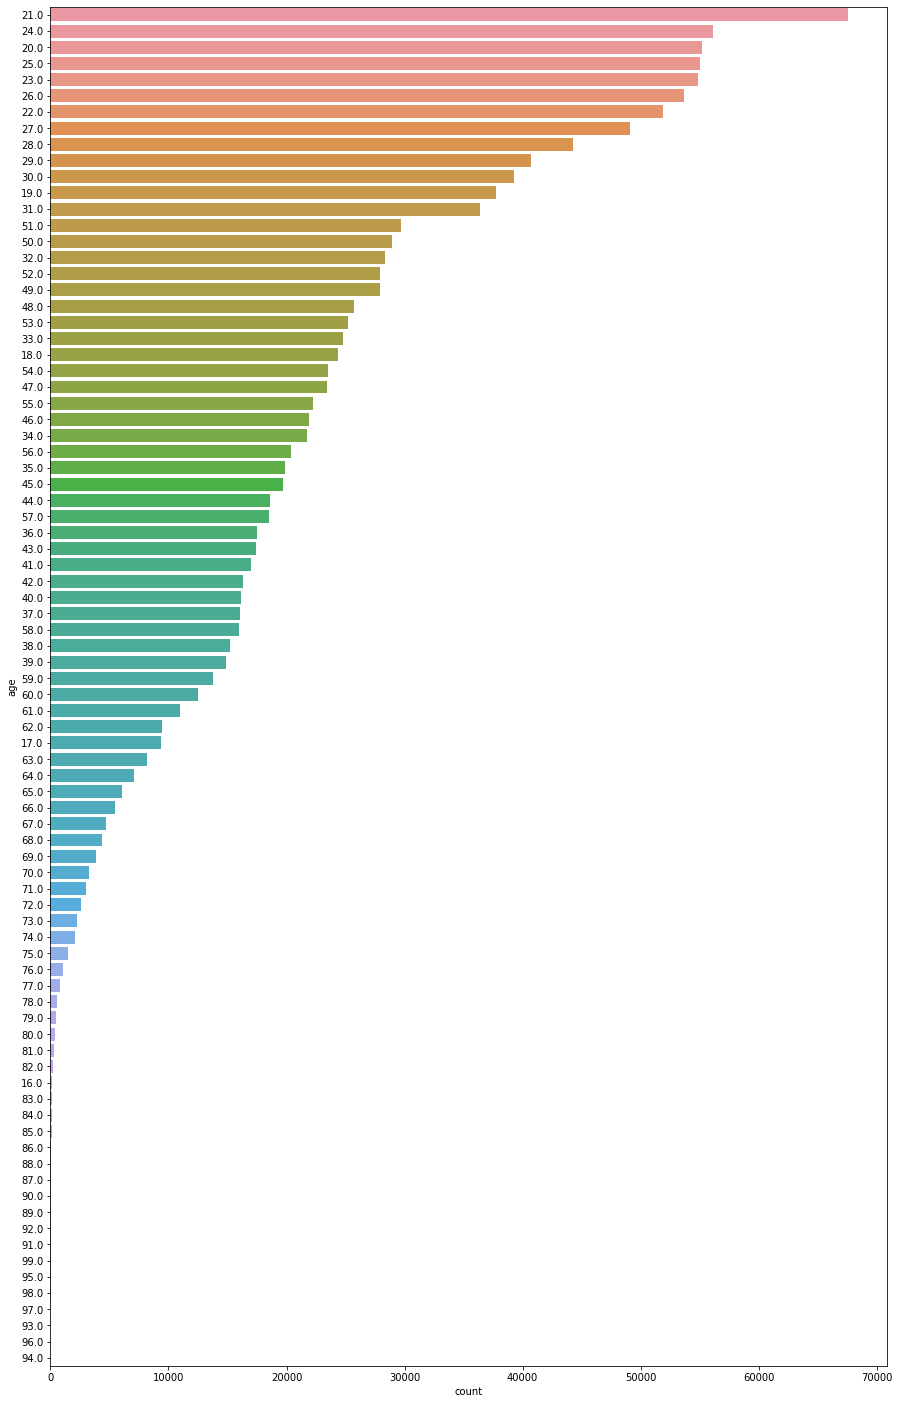

In [49]:
f, ax = plt.subplots(figsize = (15, 25))
sns.countplot(data = customers, y = 'age', order = customers['age'].value_counts().index)

###### 연령대별로 살펴보자

In [43]:
def get_age_group(age):
    group = ''
    if age <= 19 : group = '10s'
    elif age <= 29 : group = '20s'
    elif age <= 39 : group = '30s'
    elif age <= 49 : group = '40s'
    elif age <= 59 : group = '50s'
    elif age <= 69 : group = '60s'
    elif age <= 79 : group = '70s'
    elif age <= 89 : group = '80s'
    elif age <= 99 : group = '90s'
    else : group = 'NaN'
    return group

customers['age_group'] = customers['age'].apply(lambda x : get_age_group(x))
pd.DataFrame(customers.groupby(['age_group']).size())

,0
age_group,
10s,71583
20s,528358
30s,234068
40s,204118
50s,226242
60s,72623
70s,17611
80s,1415
90s,101


In [44]:
customers[customers['age_group']=='NaN']

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,None,None,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...,NaN
54,0002b9088196900626214bcdc6d5f3d85f38fb462a4806...,NaN,NaN,ACTIVE,NONE,NaN,db2cef710598164a99187237dd049b68502590eeb41ca3...,NaN
99,0004690d2b68d5175697d197a86065595ef7b49c7c051b...,NaN,NaN,PRE-CREATE,NONE,NaN,d831ea0a55a7a7af0e3ff9da0d370e225242bbc7999d78...,NaN
138,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,NaN,NaN,ACTIVE,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...,NaN
148,00060d2f1e63f2b95268b8573996b9aa5612a3efc97c71...,NaN,NaN,PRE-CREATE,NONE,NaN,f2288fb8f9b8ee2c3e56d6aa813d2a22f820cdfabf27a6...,NaN
...,...,...,...,...,...,...,...,...
1371583,ffecf38e80a8d73c9c6fb6db193e559dbd5374747b4b88...,NaN,NaN,PRE-CREATE,NONE,NaN,f1aed4d6848c484f218f9f9de2820c3f072ece21a043f4...,NaN
1371637,ffefa8fa76909f9b9b3c14680d3e00dae891de5d1522f9...,NaN,NaN,PRE-CREATE,NONE,NaN,d83ed3f6f943055853438d25031e896102bb960d07074a...,NaN
1371712,fff2f8b52ac6983cf9b2332d1a9bfe0ef38349a8d5392e...,NaN,NaN,ACTIVE,NONE,NaN,3802682b139e3cd0631970d555e4af072475e4dd92ea0a...,NaN
1371888,fffb069903e91c2ea4d665851b821c3f812e184119e5a8...,NaN,NaN,PRE-CREATE,NONE,NaN,0e6ad38084bfc681be59ae67f0225049cee4dfef044c29...,NaN


<AxesSubplot:xlabel='age_group', ylabel='count'>

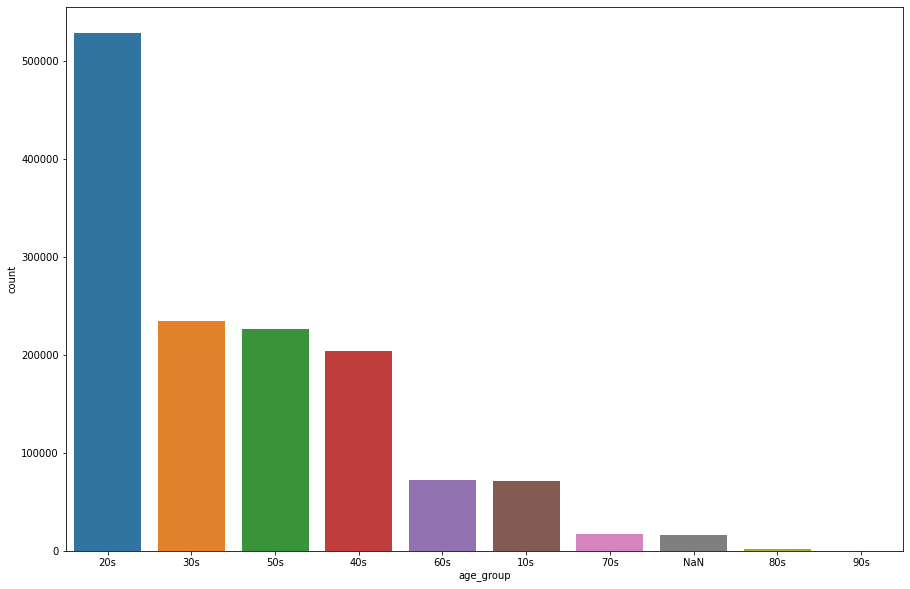

In [51]:
f, ax = plt.subplots(figsize = (15, 10))
sns.countplot(data = customers, x = 'age_group', order = customers['age_group'].value_counts().index)

<AxesSubplot:ylabel='age_group'>

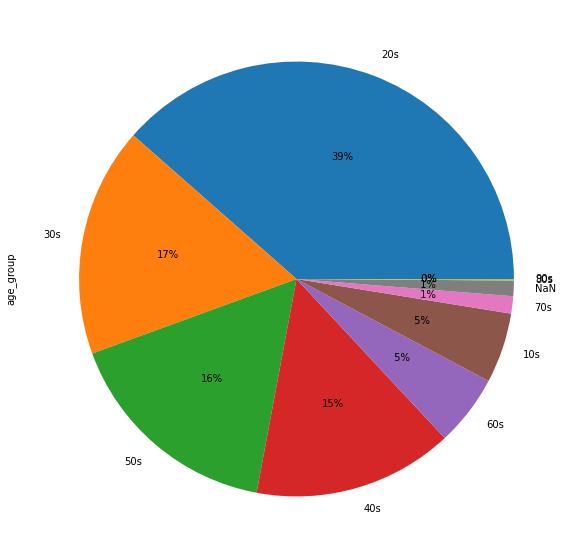

In [61]:
customers['age_group'].value_counts().plot(kind='pie', autopct='%2.f%%',figsize=(15,10))

<AxesSubplot:xlabel='age_group', ylabel='Count'>

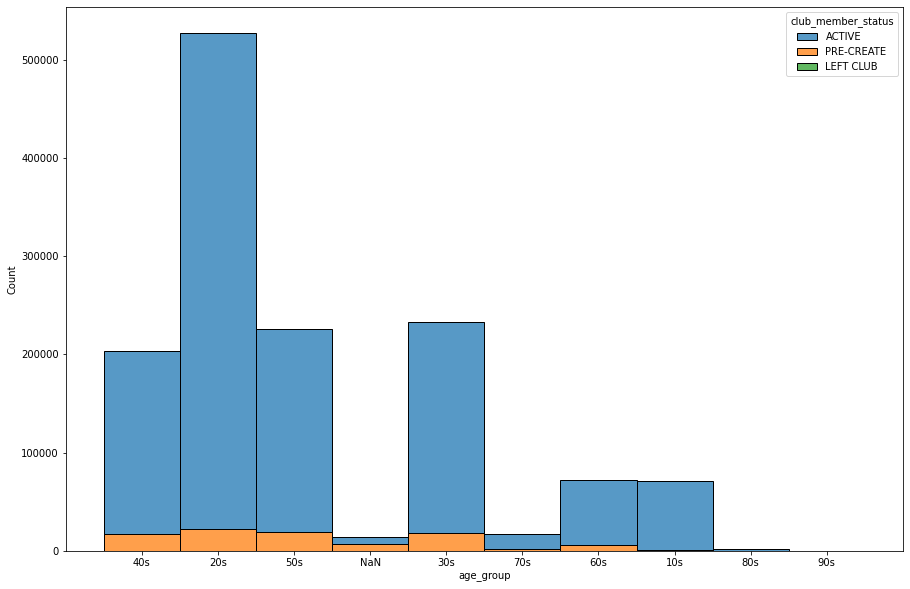

In [55]:

f, ax = plt.subplots(figsize = (15, 10))
sns.histplot(data = customers, x = 'age_group', hue = 'club_member_status', multiple = 'stack')

##### 각 연령대별로 club_member_status나 FN의 비중이 어떻게 되는지, 비중이 가장 높은 연령대는 어디인지?

성별 데이터가 없다는게 굉장히 아쉬운 부분..ㅜ